Linear Model

,Model,Rolling Window,R2,MSE,MAE,Directional Accuracy
2,Lasso,5,-0.000,0.001,0.018,0.000
8,Lasso,21,-0.000,0.001,0.018,0.000
14,Lasso,252,-0.000,0.001,0.018,0.000
20,Lasso,512,-0.000,0.001,0.019,0.000
0,OLS,5,-0.004,0.001,0.018,0.638
6,OLS,21,-0.004,0.001,0.018,0.636
12,OLS,252,-0.004,0.001,0.018,0.627
18,OLS,512,-0.006,0.001,0.019,0.644
4,PCR,5,-0.003,0.001,0.018,0.565
10,PCR,21,-0.002,0.001,0.018,0.543


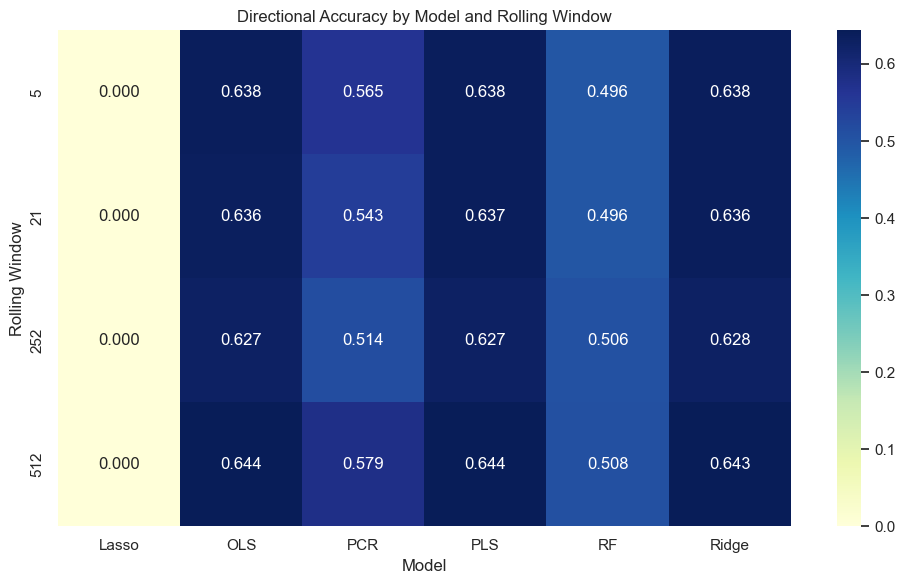

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


result_linear = pd.read_csv("Results/results_linear_new_directional.csv")
# display(result_linear)
linear_sorted = result_linear.sort_values(by=['Model','Rolling Window']).round(3)
display(linear_sorted)


# Assuming your DataFrame is called `df`
pivot_da = result_linear.pivot(index='Rolling Window', columns='Model', values='Directional Accuracy')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_da, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Directional Accuracy by Model and Rolling Window")
plt.tight_layout()
plt.show()


,Model,Rolling Window,R2,MSE,MAE,Directional Accuracy
0,NN_1_layers,5,-0.021,0.001,0.018,0.008
5,NN_1_layers,21,-0.021,0.001,0.018,0.006
10,NN_1_layers,252,-0.138,0.001,0.018,0.009
15,NN_1_layers,512,-0.073,0.001,0.019,0.015
1,NN_2_layers,5,-0.059,0.001,0.018,0.005
6,NN_2_layers,21,-0.029,0.001,0.018,0.017
11,NN_2_layers,252,-0.025,0.001,0.018,0.049
16,NN_2_layers,512,-0.066,0.001,0.019,0.003
2,NN_3_layers,5,-0.031,0.001,0.018,0.380
7,NN_3_layers,21,-0.105,0.001,0.018,0.028


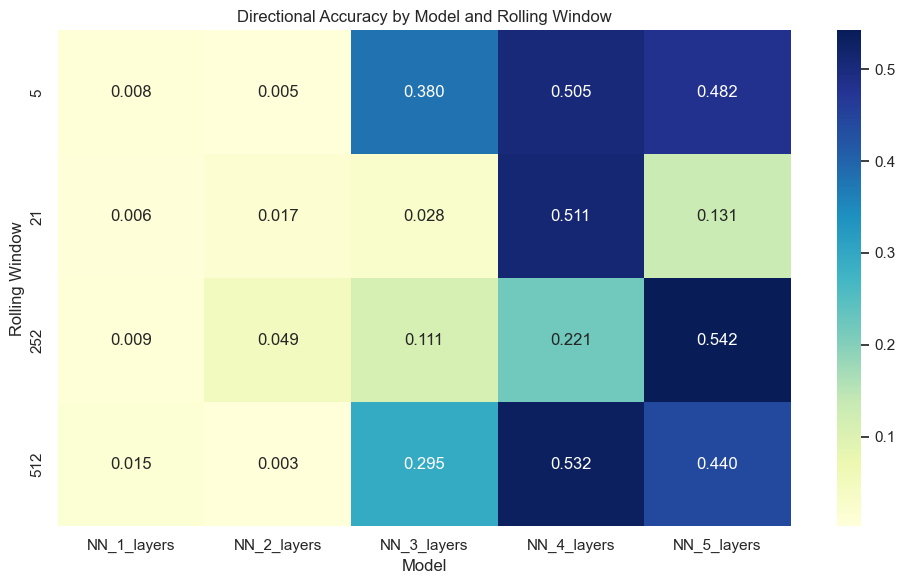

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


result_NN = pd.read_csv("Results/Result_NN.csv")
result_NN = result_NN.drop(columns=['Unnamed: 0'])
cols = ['Model', 'Rolling Window'] + [col for col in result_NN.columns if col not in ['Model', 'Rolling Window']]
result_NN = result_NN[cols]

# display(result_linear)
NN_sorted = result_NN.sort_values(by=['Model','Rolling Window']).round(3)
display(NN_sorted)


# Assuming your DataFrame is called `df`
pivot_da = NN_sorted.pivot(index='Rolling Window', columns='Model', values='Directional Accuracy')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_da, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Directional Accuracy by Model and Rolling Window")
plt.tight_layout()
plt.show()


In [4]:
top_50_df = pd.read_csv("top50_estimation.csv") 
avg_market_caps = (
    top_50_df.groupby('PERMNO')['MKT_CAP']
    .mean()
    .sort_values(ascending=False)
)

top_n = max(1, int(len(avg_market_caps) * 0.25))

# Get top 25% PERMNOs
top_25_pct_permnos = avg_market_caps.sort_values(ascending=False).head(top_n).index.tolist()
# Get top 25% PERMNOs
min_25_pct_permnos = avg_market_caps.sort_values(ascending=True).head(top_n).index.tolist()

print("Top 25% PERMNOs by Market Cap:", top_25_pct_permnos)
print("Top 25% PERMNOs by Market Cap:", min_25_pct_permnos)

Top 25% PERMNOs by Market Cap: [66093, 76226, 29647, 78405, 86339, 81696, 78840, 80924, 80089, 85991]
Top 25% PERMNOs by Market Cap: [39731, 86916, 87342, 87339, 79033, 87121, 11174, 87373, 78971, 83989]


Function Summarizze Stck 

In [5]:
def summarize_stock_groups(df_sorted, top_permnos=top_25_pct_permnos, bottom_permnos=min_25_pct_permnos):
    # All Stocks
    all_stats = df_sorted.groupby('Rolling Window').agg({
        'R2': 'mean',
        'R2_out_of_sample': 'mean',
        'MSE': 'mean',
        'Directional Accuracy': 'mean'
    }).reset_index()
    all_stats['Group'] = 'All Stocks'

    # Top 25%
    top_stats = df_sorted[df_sorted['PERMNO'].isin(top_permnos)].groupby('Rolling Window').agg({
        'R2': 'mean',
        'R2_out_of_sample': 'mean',
        'MSE': 'mean',
        'Directional Accuracy': 'mean'
    }).reset_index()
    top_stats['Group'] = 'Top 25%'

    # Bottom 25%
    bottom_stats = df_sorted[df_sorted['PERMNO'].isin(bottom_permnos)].groupby('Rolling Window').agg({
        'R2': 'mean',
        'R2_out_of_sample': 'mean',
        'MSE': 'mean',
        'Directional Accuracy': 'mean'
    }).reset_index()
    bottom_stats['Group'] = 'Bottom 25%'

    # Combine and sort
    summary_df = pd.concat([all_stats, top_stats, bottom_stats])
    summary_df = summary_df.sort_values(by=['Rolling Window', 'Group']).round(3)

    # Reorder columns
    summary_df = summary_df[['Rolling Window', 'Group', 'R2', 'R2_out_of_sample', 'MSE', 'Directional Accuracy']]

    return summary_df


In [6]:
result_chronos = pd.read_csv("Results\chronos_t5_small_results.csv")
# display(result_linear)
result_chronos_sorted = result_chronos.sort_values(by=['Model','Rolling Window']).round(3)
display(result_chronos_sorted)

chronos_avg_by_window = result_chronos_sorted.groupby(["Model","Rolling Window"])[
        ["R2", "R2_out_of_sample", "MSE", "Directional Accuracy"]
    ].mean().reset_index()

display(chronos_avg_by_window)


,Model,Rolling Window,PERMNO,R2,R2_out_of_sample,MSE,Directional Accuracy
0,Chronos,5,11174,0.003,0.004,0.001,0.636
1,Chronos,5,12173,-0.168,-0.076,0.000,0.545
2,Chronos,5,29647,-0.034,-0.016,0.000,0.455
3,Chronos,5,39731,-0.027,0.006,0.001,0.182
4,Chronos,5,47677,-0.130,-0.092,0.001,0.455
...,...,...,...,...,...,...,...
158,Chronos,512,86996,-0.193,-0.050,0.000,0.364
159,Chronos,512,87075,0.034,0.059,0.000,0.364
160,Chronos,512,87121,-0.110,-0.047,0.000,0.455
161,Chronos,512,87339,-0.043,0.006,0.001,0.455


,Model,Rolling Window,R2,R2_out_of_sample,MSE,Directional Accuracy
0,Chronos,5,-0.064209,-0.016000,0.001000,0.467209
1,Chronos,21,-0.054372,-0.020814,0.001116,0.479930
2,Chronos,252,-0.158650,-0.073750,0.000225,0.490925
3,Chronos,512,-0.106838,-0.014568,0.000270,0.520946


In [7]:
result_timefm = pd.read_csv("Results\\timesfm-2.0-500m_results.csv")
# display(result_linear)
timefm_sorted = result_timefm.sort_values(by=['Model','Rolling Window']).round(3)
display(timefm_sorted)

timefm_avg_by_window = timefm_sorted.groupby(["Model","Rolling Window"])[
        ["R2", "R2_out_of_sample", "MSE", "Directional Accuracy"]
    ].mean().reset_index()

display(timefm_avg_by_window)


,Model,Rolling Window,PERMNO,R2,R2_out_of_sample,MSE,Directional Accuracy
0,TimeFM 2.0,5,11174,-0.010,-0.009,0.001,0.545
1,TimeFM 2.0,5,12173,-0.109,-0.022,0.000,0.636
2,TimeFM 2.0,5,29647,-0.001,0.016,0.000,0.636
3,TimeFM 2.0,5,39731,-0.062,-0.029,0.001,0.545
4,TimeFM 2.0,5,47677,-0.057,-0.022,0.001,0.455
...,...,...,...,...,...,...,...
158,TimeFM 2.0,512,86996,-0.215,-0.070,0.000,0.455
159,TimeFM 2.0,512,87075,-0.021,0.005,0.000,0.455
160,TimeFM 2.0,512,87121,-0.006,0.051,0.000,0.455
161,TimeFM 2.0,512,87339,-0.176,-0.121,0.001,0.636


,Model,Rolling Window,R2,R2_out_of_sample,MSE,Directional Accuracy
0,TimeFM 2.0,5,-0.071279,-0.020233,0.001000,0.513698
1,TimeFM 2.0,21,-0.054930,-0.021093,0.001047,0.503233
2,TimeFM 2.0,252,-0.117500,-0.033450,0.000225,0.490950
3,TimeFM 2.0,512,-0.092703,-0.000027,0.000270,0.481595


In [8]:
result_uni2ts = pd.read_csv("Results\moirai-moe-1.0.csv")
# display(result_linear)
uni2ts_sorted = result_uni2ts.sort_values(by=['Model','Rolling Window']).round(3)
display(timefm_sorted)

uni2ts_avg_by_window = uni2ts_sorted.groupby(["Model","Rolling Window"])[
        ["R2", "R2_out_of_sample", "MSE", "Directional Accuracy"]
    ].mean().reset_index()

display(uni2ts_avg_by_window)

,Model,Rolling Window,PERMNO,R2,R2_out_of_sample,MSE,Directional Accuracy
0,TimeFM 2.0,5,11174,-0.010,-0.009,0.001,0.545
1,TimeFM 2.0,5,12173,-0.109,-0.022,0.000,0.636
2,TimeFM 2.0,5,29647,-0.001,0.016,0.000,0.636
3,TimeFM 2.0,5,39731,-0.062,-0.029,0.001,0.545
4,TimeFM 2.0,5,47677,-0.057,-0.022,0.001,0.455
...,...,...,...,...,...,...,...
158,TimeFM 2.0,512,86996,-0.215,-0.070,0.000,0.455
159,TimeFM 2.0,512,87075,-0.021,0.005,0.000,0.455
160,TimeFM 2.0,512,87121,-0.006,0.051,0.000,0.455
161,TimeFM 2.0,512,87339,-0.176,-0.121,0.001,0.636


,Model,Rolling Window,R2,R2_out_of_sample,MSE,Directional Accuracy
0,Uni2TS-MoiraiMoE,5,-0.552326,-0.461605,0.001791,0.579116
1,Uni2TS-MoiraiMoE,21,-1.374605,-1.249047,0.002628,0.473535
2,Uni2TS-MoiraiMoE,252,-2.044450,-1.311900,0.000875,0.445575
3,Uni2TS-MoiraiMoE,512,-0.994973,-0.834351,0.000595,0.503649


In [9]:
chronos_summarized = summarize_stock_groups(result_chronos_sorted)
timefm_summarized = summarize_stock_groups(timefm_sorted)
uni2ts_summarized = summarize_stock_groups(uni2ts_sorted)

In [10]:
chronos_summarized['Model'] = 'Chronos'
timefm_summarized['Model'] = 'TimeFM'
uni2ts_summarized['Model'] = 'UniTS'

# Combine all into one DataFrame
merged_df = pd.concat([chronos_summarized, timefm_summarized, uni2ts_summarized], ignore_index=True)
merged_avg_by_window_df = pd.concat([chronos_avg_by_window, timefm_avg_by_window, uni2ts_avg_by_window], ignore_index=True)


In [11]:
# Make sure 'Rolling Window' is treated as categorical and sorted properly
merged_df['Rolling Window'] = merged_df['Rolling Window'].astype(str)
merged_df = merged_df.sort_values(by=['Model', 'Group', 'Rolling Window'])

In [36]:
display(merged_df)
display(merged_avg_by_window_df)

,Rolling Window,Group,R2,R2_out_of_sample,MSE,Directional Accuracy,Model
3,21,All Stocks,-0.054,-0.021,0.001,0.480,Chronos
6,252,All Stocks,-0.159,-0.074,0.000,0.491,Chronos
0,5,All Stocks,-0.064,-0.016,0.001,0.467,Chronos
9,512,All Stocks,-0.107,-0.015,0.000,0.521,Chronos
4,21,Bottom 25%,-0.083,-0.025,0.002,0.482,Chronos
7,252,Bottom 25%,-0.127,-0.050,0.000,0.566,Chronos
1,5,Bottom 25%,-0.076,-0.012,0.002,0.400,Chronos
10,512,Bottom 25%,-0.116,-0.013,0.001,0.495,Chronos
5,21,Top 25%,-0.031,-0.020,0.001,0.500,Chronos
8,252,Top 25%,-0.136,-0.107,0.000,0.454,Chronos


,Model,Rolling Window,R2,R2_out_of_sample,MSE,Directional Accuracy
0,Chronos,5,-0.064209,-0.016000,0.001000,0.467209
1,Chronos,21,-0.054372,-0.020814,0.001116,0.479930
2,Chronos,252,-0.158650,-0.073750,0.000225,0.490925
3,Chronos,512,-0.106838,-0.014568,0.000270,0.520946
4,TimeFM 2.0,5,-0.071279,-0.020233,0.001000,0.513698
5,TimeFM 2.0,21,-0.054930,-0.021093,0.001047,0.503233
6,TimeFM 2.0,252,-0.117500,-0.033450,0.000225,0.490950
7,TimeFM 2.0,512,-0.092703,-0.000027,0.000270,0.481595
8,Uni2TS-MoiraiMoE,5,-0.552326,-0.461605,0.001791,0.579116
9,Uni2TS-MoiraiMoE,21,-1.374605,-1.249047,0.002628,0.473535


In [38]:
merged_21 = merged_df[merged_df['Rolling Window']=='21']
display(merged_21)

# Define custom sort order for 'Group'
group_order = pd.CategoricalDtype(['All Stocks', 'Top 25%', 'Bottom 25%'], ordered=True)

# Apply the ordering to your DataFrame
merged_21['Group'] = merged_21['Group'].astype(group_order)

# Sort by Model and Group (or any other column you want)
merged_21_sort = merged_21.sort_values(by=['Model', 'Group'])  # or just by ['Group'] if model doesn't matter
display(merged_21_sort)

,Rolling Window,Group,R2,R2_out_of_sample,MSE,Directional Accuracy,Model
3,21,All Stocks,-0.054,-0.021,0.001,0.480,Chronos
4,21,Bottom 25%,-0.083,-0.025,0.002,0.482,Chronos
5,21,Top 25%,-0.031,-0.020,0.001,0.500,Chronos
15,21,All Stocks,-0.055,-0.021,0.001,0.503,TimeFM
16,21,Bottom 25%,-0.077,-0.021,0.002,0.545,TimeFM
17,21,Top 25%,-0.007,0.003,0.001,0.464,TimeFM
27,21,All Stocks,-1.375,-1.249,0.003,0.474,UniTS
28,21,Bottom 25%,-1.024,-0.918,0.003,0.509,UniTS
29,21,Top 25%,-0.224,-0.143,0.001,0.455,UniTS


C:\Users\fazlu\AppData\Local\Temp\ipykernel_16452\200293331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_21['Group'] = merged_21['Group'].astype(group_order)


,Rolling Window,Group,R2,R2_out_of_sample,MSE,Directional Accuracy,Model
3,21,All Stocks,-0.054,-0.021,0.001,0.480,Chronos
5,21,Top 25%,-0.031,-0.020,0.001,0.500,Chronos
4,21,Bottom 25%,-0.083,-0.025,0.002,0.482,Chronos
15,21,All Stocks,-0.055,-0.021,0.001,0.503,TimeFM
17,21,Top 25%,-0.007,0.003,0.001,0.464,TimeFM
16,21,Bottom 25%,-0.077,-0.021,0.002,0.545,TimeFM
27,21,All Stocks,-1.375,-1.249,0.003,0.474,UniTS
29,21,Top 25%,-0.224,-0.143,0.001,0.455,UniTS
28,21,Bottom 25%,-1.024,-0.918,0.003,0.509,UniTS


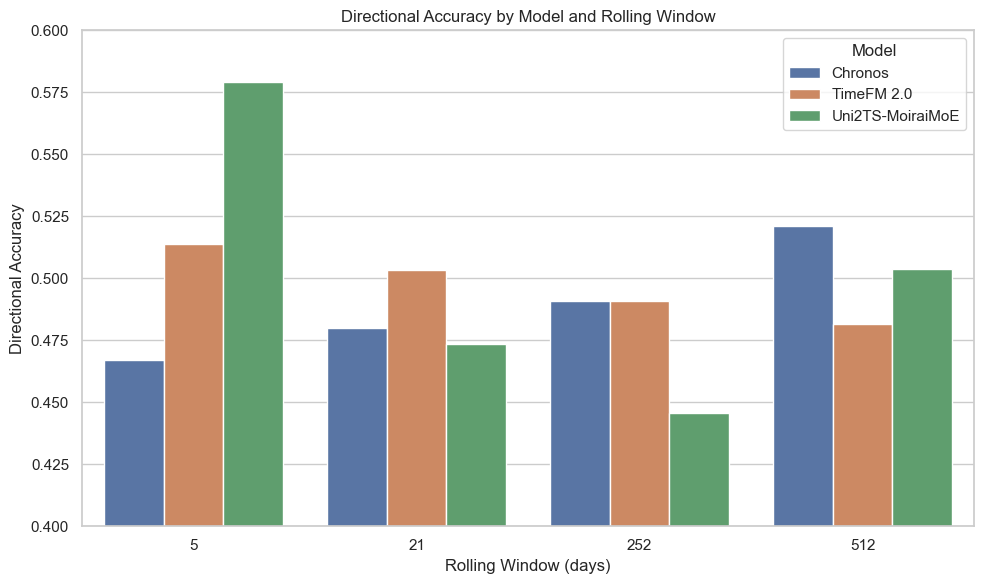

In [ ]:
merged_avg_by_window_df["Rolling Window"] = pd.Categorical(merged_avg_by_window_df["Rolling Window"], categories=[5, 21, 252, 512], ordered=True)

# Set seaborn style
sns.set(style="whitegrid")
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_avg_by_window_df, x="Rolling Window", y="Directional Accuracy", hue="Model")
plt.title("Directional Accuracy by Model and Rolling Window")
plt.ylim(0.4, 0.6)
plt.ylabel("Directional Accuracy")
plt.xlabel("Rolling Window (days)")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

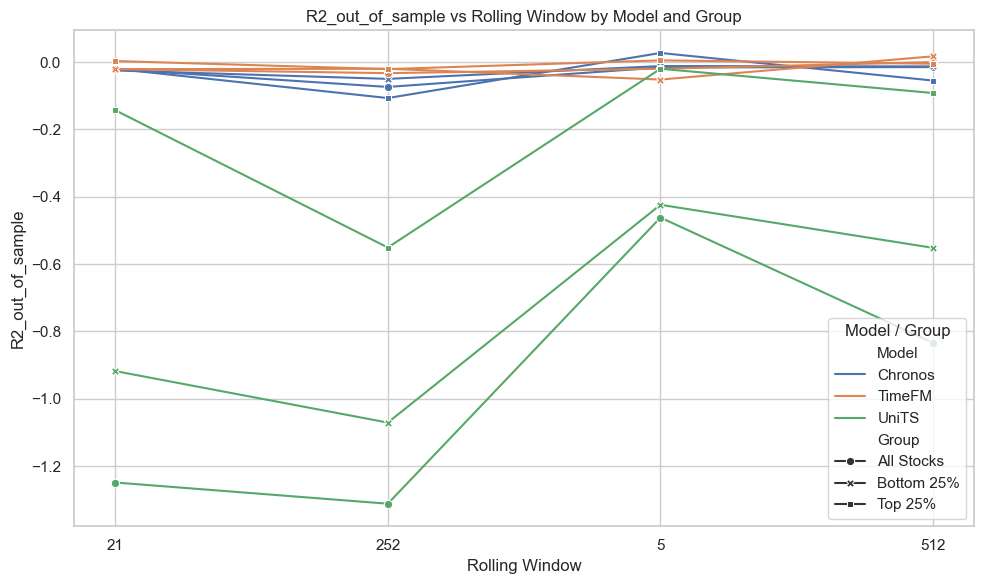

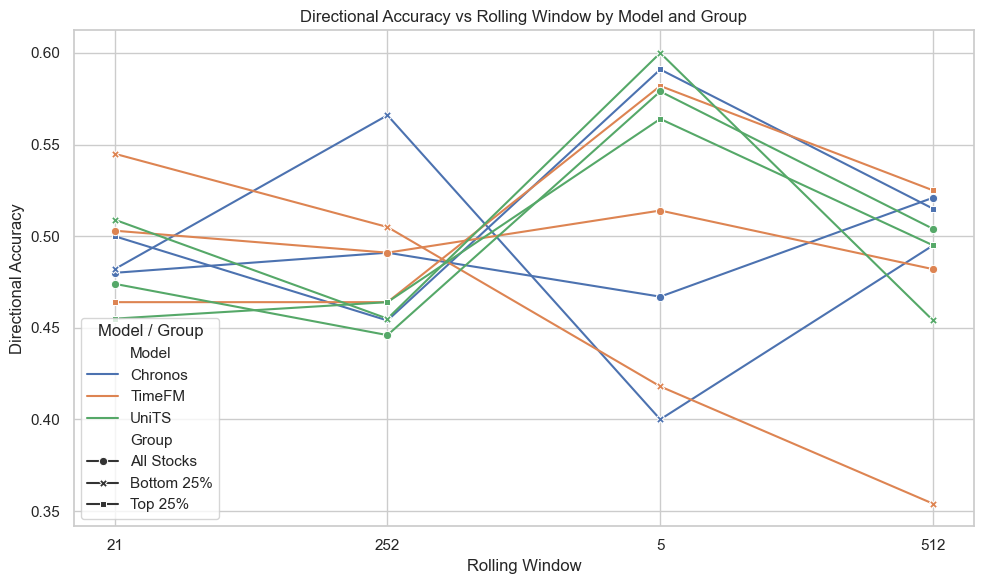

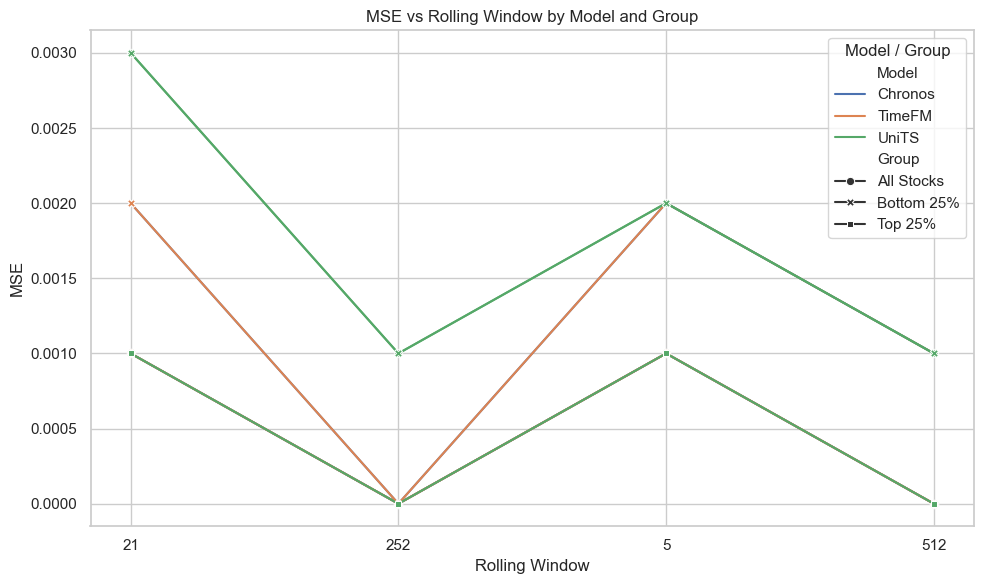

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the visual style
sns.set(style="whitegrid")

# Define metric to visualize
metrics = ['R2_out_of_sample', 'Directional Accuracy', 'MSE']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=merged_df,
        x='Rolling Window',
        y=metric,
        hue='Model',
        style='Group',
        markers=True,
        dashes=False
    )
    plt.title(f'{metric} vs Rolling Window by Model and Group')
    plt.ylabel(metric)
    plt.xlabel('Rolling Window')
    plt.xticks(merged_df['Rolling Window'].unique())
    plt.legend(title='Model / Group')
    plt.tight_layout()
    plt.show()


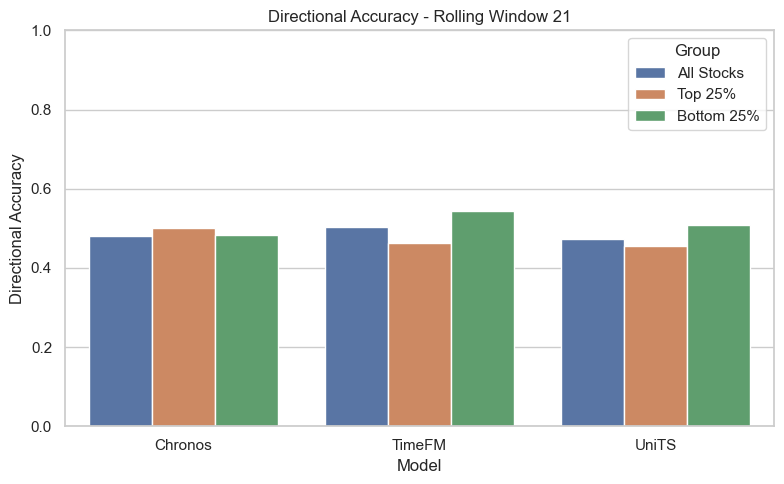

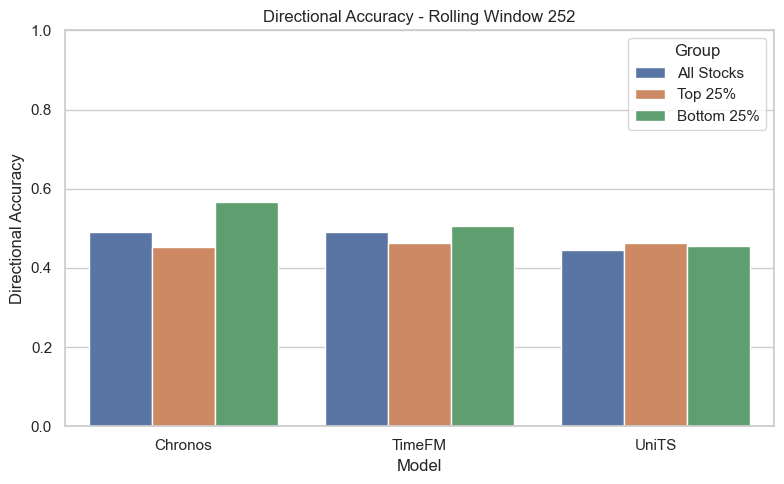

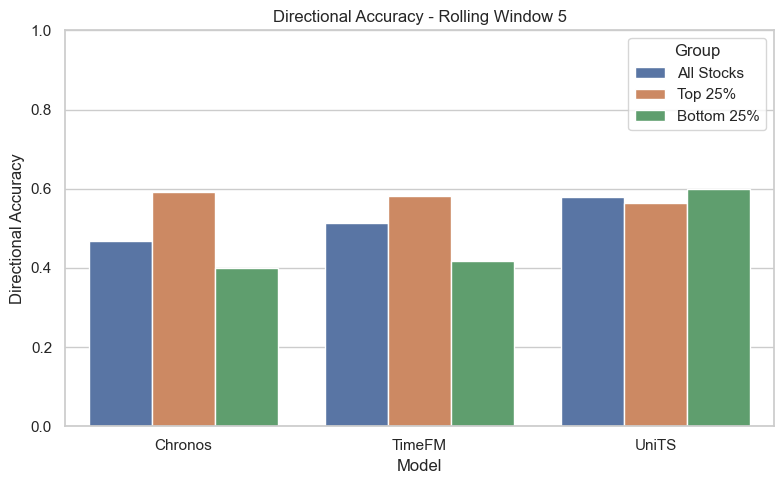

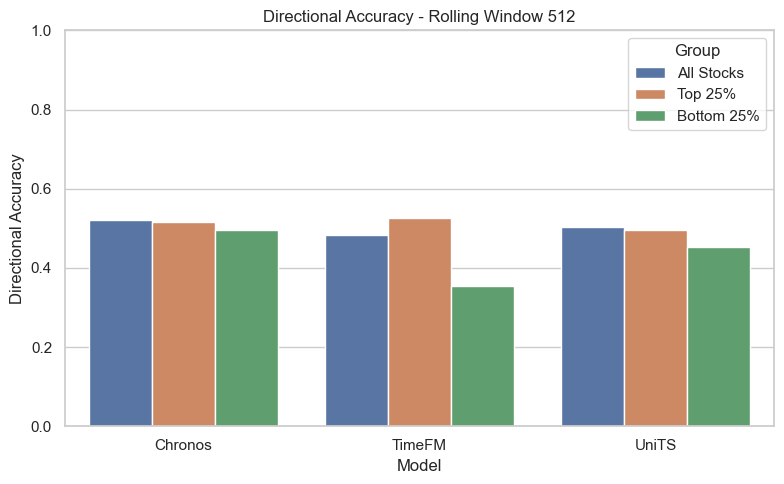

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample structure (replace with your real data)

# Ensure proper category order
merged_df['Rolling Window'] = pd.Categorical(merged_df['Rolling Window'], categories=['5', '21', '252', '512'], ordered=True)
group_order = ['All Stocks', 'Top 25%', 'Bottom 25%']
model_order = merged_df['Model'].unique()

print()
# Plotting
sns.set(style="whitegrid")
rolling_windows = merged_df['Rolling Window'].unique()


for window in rolling_windows:
    plt.figure(figsize=(8, 5))
    subset = merged_df[merged_df['Rolling Window'] == window]
    
    # Create a grouped barplot
    sns.barplot(
        data=subset,
        x='Model',
        y='Directional Accuracy',
        hue='Group',
        order=model_order,
        hue_order=group_order
    )
    
    plt.title(f'Directional Accuracy - Rolling Window {window}')
    plt.ylim(0, 1)
    plt.ylabel('Directional Accuracy')
    plt.xlabel('Model')
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()

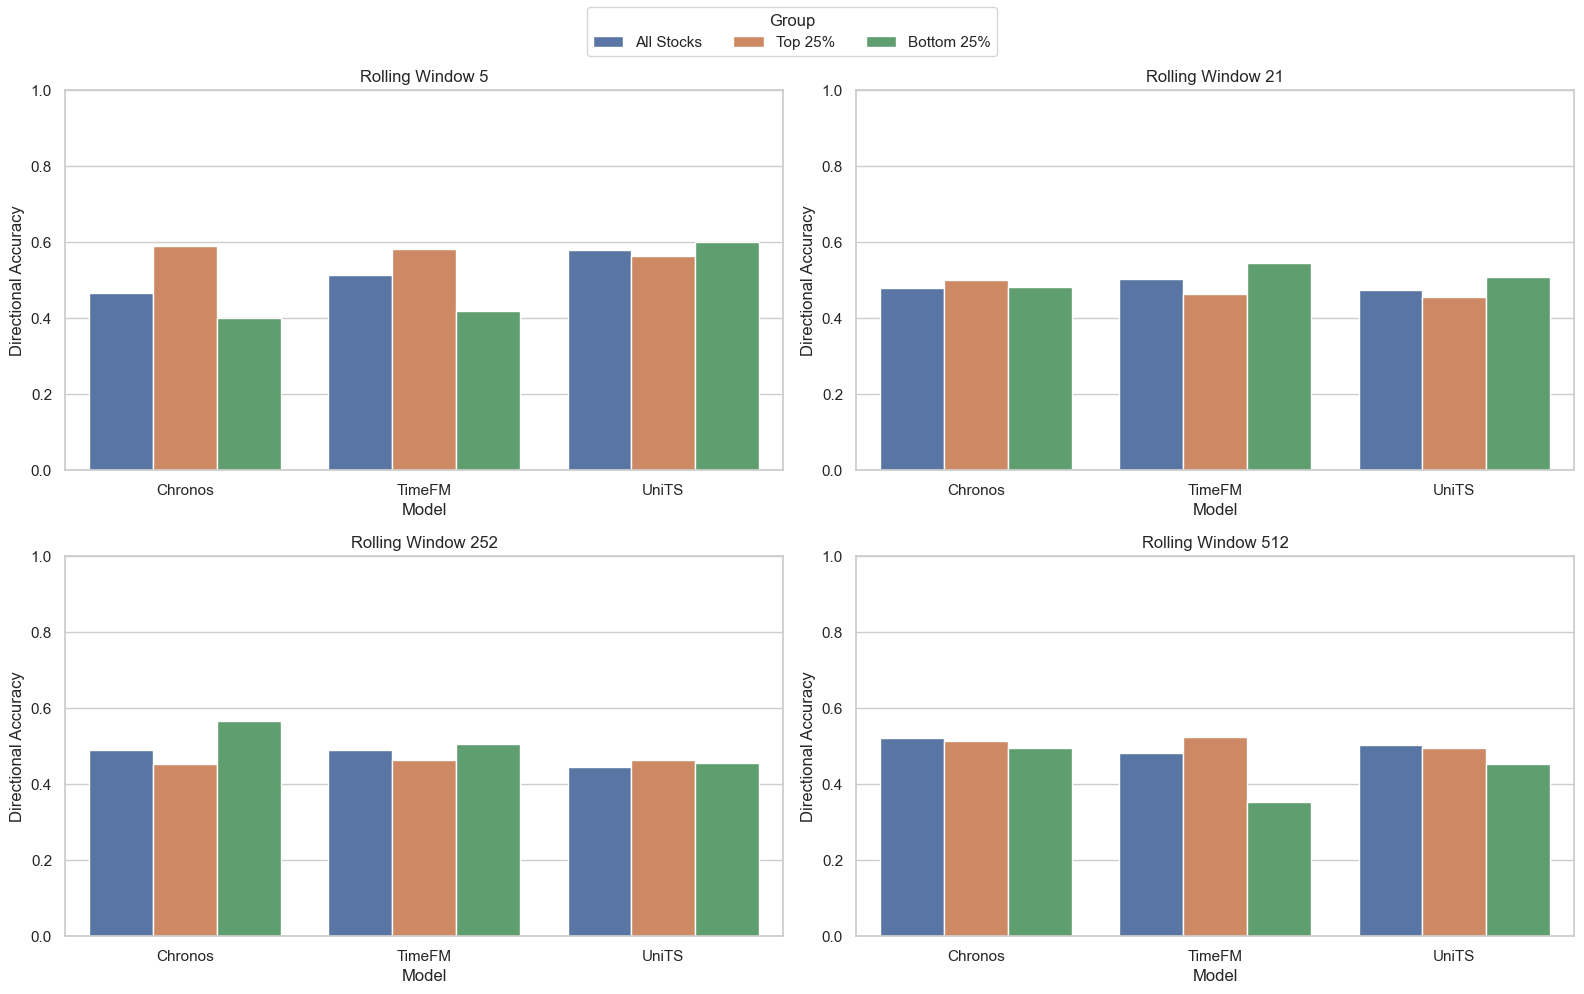

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct order
merged_df['Rolling Window'] = pd.Categorical(merged_df['Rolling Window'], categories=['5', '21', '252', '512'], ordered=True)
group_order = ['All Stocks', 'Top 25%', 'Bottom 25%']
model_order = merged_df['Model'].unique()
rolling_windows = merged_df['Rolling Window'].cat.categories

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # flatten 2D array to 1D for easy iteration

# Plot each rolling window in a subplot
for i, window in enumerate(rolling_windows):
    subset = merged_df[merged_df['Rolling Window'] == window]
    sns.barplot(
        data=subset,
        x='Model',
        y='Directional Accuracy',
        hue='Group',
        order=model_order,
        hue_order=group_order,
        ax=axes[i]
    )
    axes[i].set_title(f'Rolling Window {window}')
    axes[i].set_ylim(0, 1)
    axes[i].set_ylabel('Directional Accuracy')
    axes[i].set_xlabel('Model')

# Adjust legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Group', loc='upper center', ncol=3)
for ax in axes:
    ax.legend_.remove()  # remove individual legends

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for the shared legend
plt.show()


In [ ]:
linear_sorted
NN_sorted
merged_avg_by_window_df

In [24]:
merged_all = pd.concat([linear_sorted, NN_sorted, merged_avg_by_window_df], ignore_index=True).round(3)
display(merged_all)
merged_all.to_csv("Results/results_all.csv", index=False)

,Model,Rolling Window,R2,MSE,MAE,Directional Accuracy,R2_out_of_sample
0,Lasso,5,-0.000,0.001,0.018,0.000,NaN
1,Lasso,21,-0.000,0.001,0.018,0.000,NaN
2,Lasso,252,-0.000,0.001,0.018,0.000,NaN
3,Lasso,512,-0.000,0.001,0.019,0.000,NaN
4,OLS,5,-0.004,0.001,0.018,0.638,NaN
5,OLS,21,-0.004,0.001,0.018,0.636,NaN
6,OLS,252,-0.004,0.001,0.018,0.627,NaN
7,OLS,512,-0.006,0.001,0.019,0.644,NaN
8,PCR,5,-0.003,0.001,0.018,0.565,NaN
9,PCR,21,-0.002,0.001,0.018,0.543,NaN


In [23]:
avg_da_by_window = merged_all.groupby('Rolling Window')['Directional Accuracy'].mean().sort_values(ascending=False)
print(avg_da_by_window)


Rolling Window
5      0.422500
512    0.415000
252    0.375857
21     0.364143
Name: Directional Accuracy, dtype: float64


In [34]:
summary = merged_all[merged_all['Rolling Window']==5]
summary = summary.drop(columns=['Rolling Window','R2_out_of_sample'])
display(summary.sort_values(by='Directional Accuracy',ascending=False))

,Model,R2,MSE,MAE,Directional Accuracy
4,OLS,-0.004,0.001,0.018,0.638
12,PLS,-0.004,0.001,0.018,0.638
20,Ridge,-0.004,0.001,0.018,0.638
52,Uni2TS-MoiraiMoE,-0.552,0.002,NaN,0.579
8,PCR,-0.003,0.001,0.018,0.565
48,TimeFM 2.0,-0.071,0.001,NaN,0.514
36,NN_4_layers,-0.093,0.001,0.018,0.505
16,RF,-0.064,0.001,0.018,0.496
40,NN_5_layers,-0.085,0.001,0.018,0.482
44,Chronos,-0.064,0.001,NaN,0.467


In [21]:
best_window_per_model = merged_all.loc[merged_all.groupby('Model')['Directional Accuracy'].idxmax()][['Model', 'Rolling Window', 'Directional Accuracy']]
print(best_window_per_model.sort_values(by='Directional Accuracy', ascending=False))


               Model  Rolling Window  Directional Accuracy
15               PLS             512              0.644000
7                OLS             512              0.644000
23             Ridge             512              0.643000
52  Uni2TS-MoiraiMoE               5              0.579116
11               PCR             512              0.579000
42       NN_5_layers             252              0.542000
39       NN_4_layers             512              0.532000
47           Chronos             512              0.520946
48        TimeFM 2.0               5              0.513698
19                RF             512              0.508000
32       NN_3_layers               5              0.380000
30       NN_2_layers             252              0.049000
27       NN_1_layers             512              0.015000
0              Lasso               5              0.000000


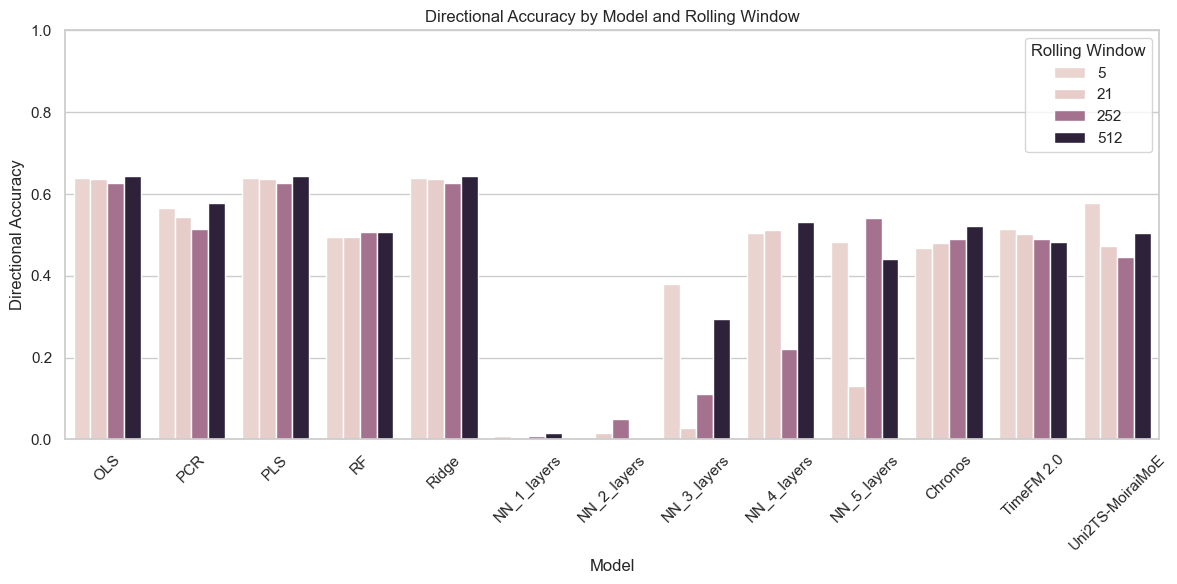

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data: filter rows with valid Directional Accuracy
df_clean = merged_all[merged_all["Directional Accuracy"].notna() & (merged_all["Directional Accuracy"] > 0)]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_clean,
    x="Model",
    y="Directional Accuracy",
    hue="Rolling Window"
)
plt.title("Directional Accuracy by Model and Rolling Window")
plt.ylabel("Directional Accuracy")
plt.ylim(0, 1)
plt.legend(title="Rolling Window")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
